In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import graphviz 
import seaborn as sns 
import matplotlib as plt 

#ML libraries(decision tree) 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Display control
pd.options.display.max_columns=50

sns.set(style="darkgrid", rc={'axes.facecolor':'#616E7C'})
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')




In [2]:
#Reading the data
df=pd.read_csv('heart_disease.csv')
df.head(30)#  shows the first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
#logistic regression
#predict one or more possible outcome usually represented as 0 or 1
df.target.value_counts()



1    526
0    499
Name: target, dtype: int64

In [4]:

#display the mean for each  individual column depending on the numbers from the target column
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [5]:
#checking for null of NaN values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

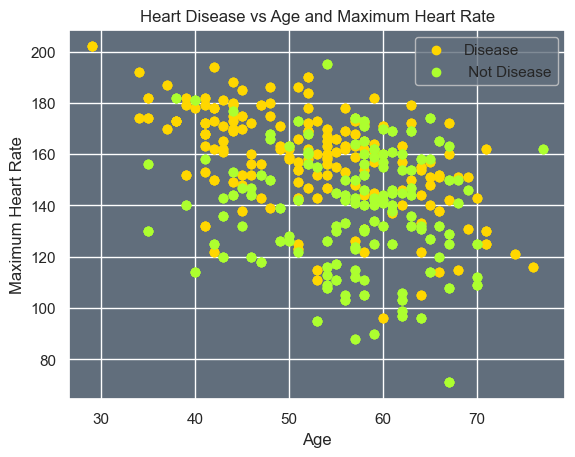

In [6]:
#creating a scatter plot for heart disease versus age and Maximum Heart Rate
import matplotlib.pyplot as plt
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='#FFD700',label='Disease')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='#ADFF2F',label=' Not Disease')
#Adding a legend
plt.legend()
#Adding labels to axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
#setting title
plt.title('Heart Disease vs Age and Maximum Heart Rate')
#showing the plot
plt.show()

In [7]:
#Logistic regression
#solving problems with classification 
#creating the independent variable and dependant variable
y=df.target.values
x_data=df.drop(['target'],axis=1)

In [8]:
#Normalising the data
x=(x_data-np.min(x_data))/(np.max(x_data))-np.min(x_data)

In [9]:
#splitting the data 80% for training and 20# for testing
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [10]:
#transpose matrix 
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [11]:
#Getting the accuracy using logistic Regression
#Getting the Test Accuracy
from sklearn.linear_model import LogisticRegression
accuracies={}
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc=lr.score(x_test.T,y_test.T)*100
accuracies['LogisticRegression']=acc
#Get output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 86.83%


In [12]:
#import the K-Nearest Neighbors (KNN )Classifiers
#Get accuracy score of the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Get output display
print('{} NN score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T) * 100))


2 NN score: 100.00%


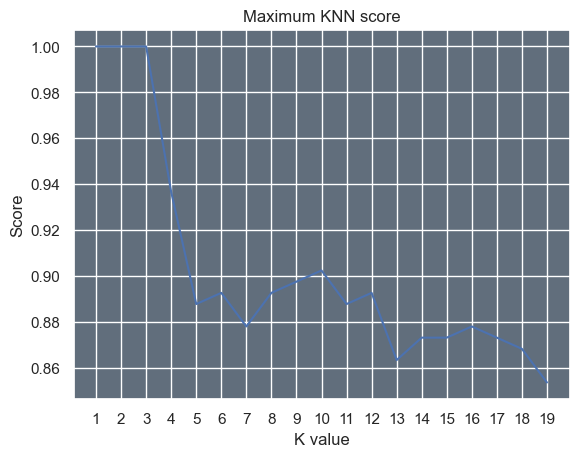

Maximum KNN score is 100.00%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

score_list = []
accuracies = {}

for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Plot the line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

# Get maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}%'.format(acc))

    
    


In [14]:
# Using the SVM
#test accuracy using the SVM Algorithm
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train.T,y_train.T)
acc=svm.score(x_train.T,y_train.T)*100
accuracies['SVM']=acc
print('Test accuracy of SVM Algorithm:{:.2f}%'.format(acc))

Test accuracy of SVM Algorithm:51.10%


In [15]:
#testing accuracy using the Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T,y_train.T)
acc=nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes']=acc
print('Accuracy  of Naive Bayes:{:.2f}%'.format(acc))

Accuracy  of Naive Bayes:85.37%


In [16]:
#model using decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train.T,y_train.T)
acc=dtc.score(x_test.T,y_test.T)*100
accuracies['Decision Tree']=acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))


Decision Tree Test Accuracy 100.00%


In [17]:
#Get accuracy of Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100,random_state=1)
rt.fit(x_train.T,y_train.T)
acc=rt.score(x_test.T,y_test.T)*100
accuracies['Random Forest']=acc
print('Random Forest Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score: 100.00%


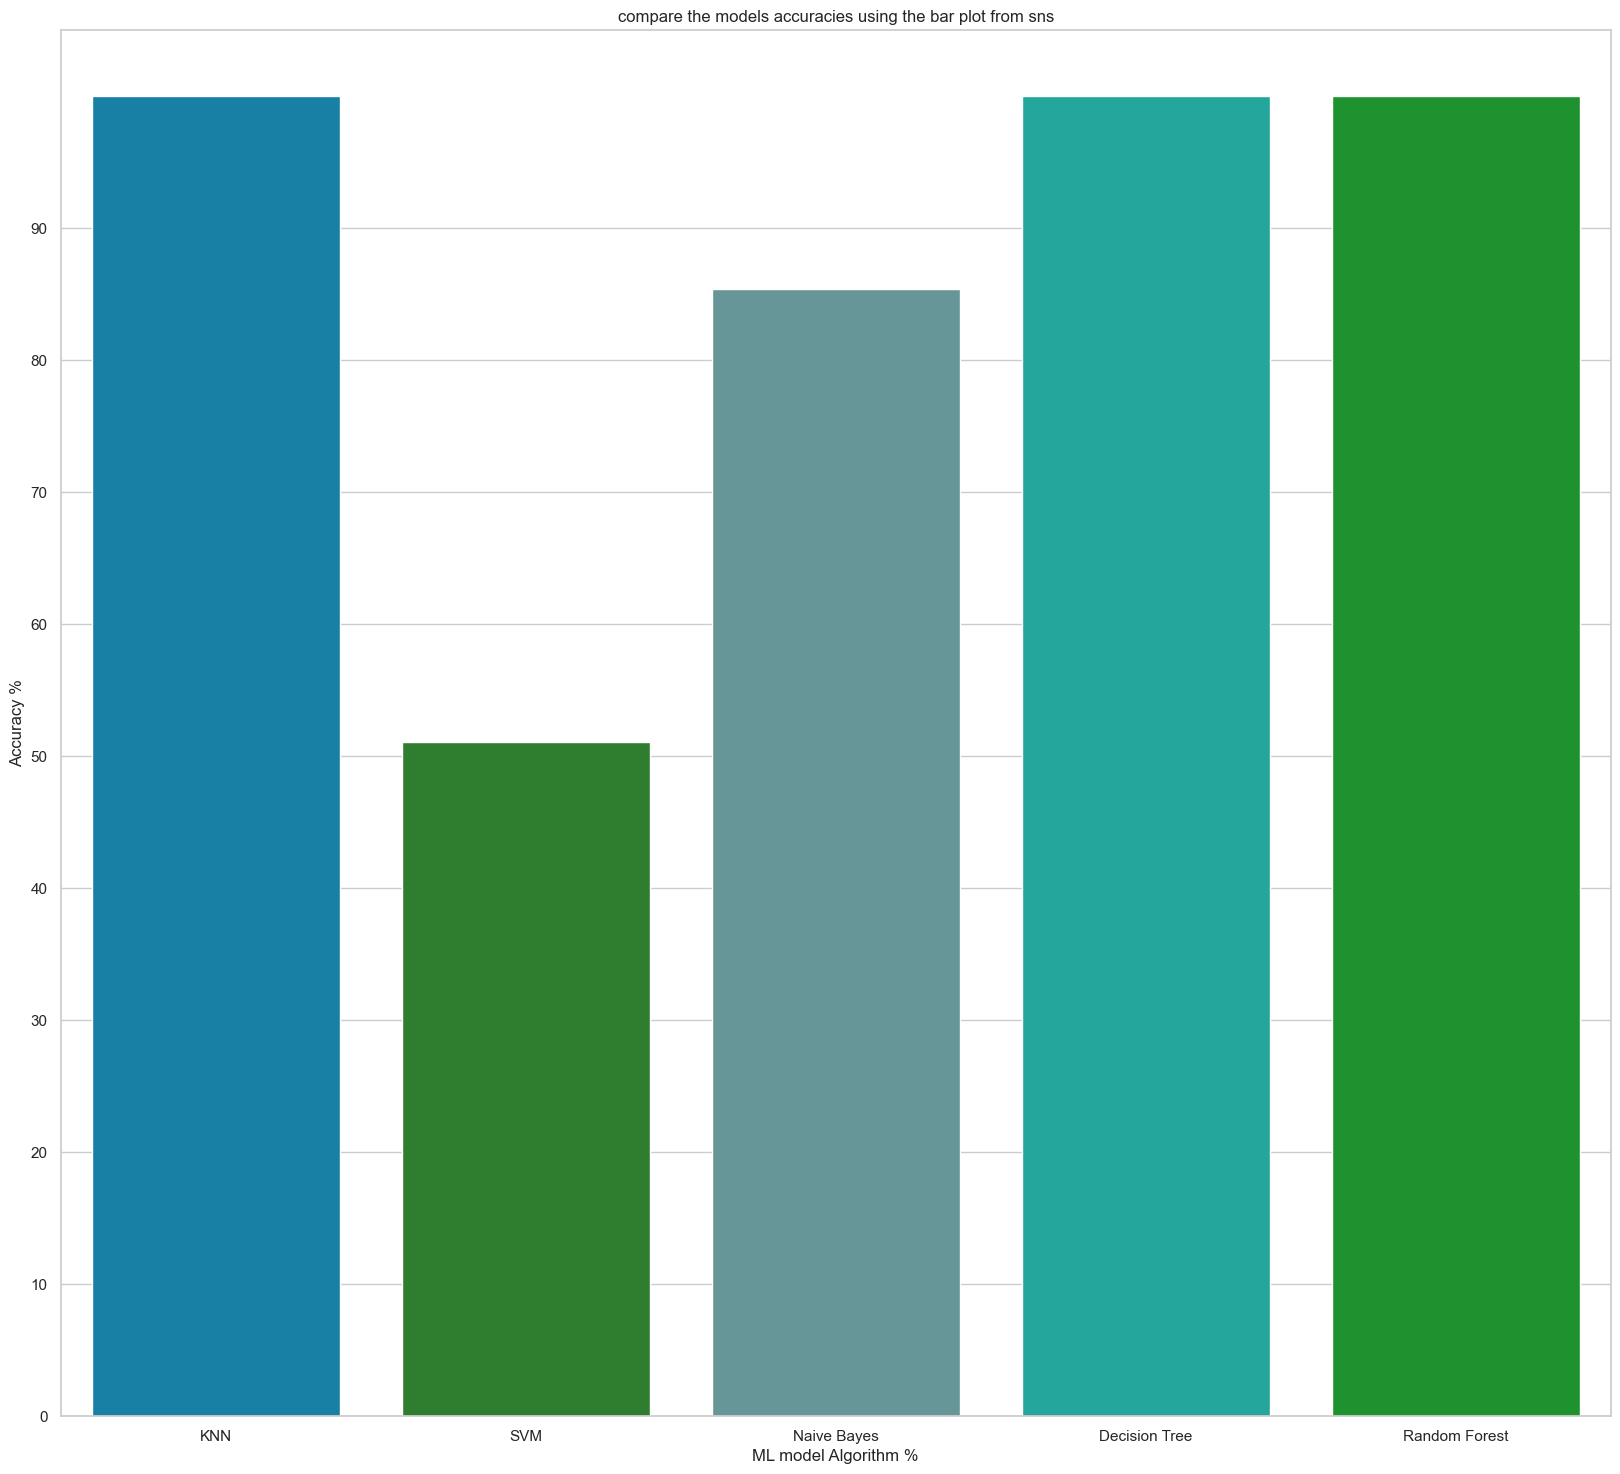

In [28]:
#compare the models accuracies using the bar plot from sns
import seaborn as sns
colors=['#008BBB',
'#228B22',
'#5F9EA0',
'#0FBBAE',
'#0AA520',
'#CFC60E']
sns.set_style('whitegrid')
plt.figure(figsize=(20,18))
plt.yticks(np.arange(0,100,10))
plt.title('compare the models accuracies using the bar plot from sns')
plt.ylabel('Accuracy %')
plt.xlabel('ML model Algorithm %')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette=colors)
plt.show()

In [40]:
# ML confusion matrix
#evaluates the performance of a classification model
#how the model performs 
#get confusion matrices to look at the imbalance dataset
#predicted values 
y_head_lr=lr.predict(x_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T,y_train.T)
y_head_knn=knn3.predict(x_test.T)
y_head_svm=svm.predict(x_test.T)
y_head_nb=nb.predict(x_test.T)
y_head_dtc=dtc.predict(x_test.T)
y_head_rt=rt.predict(x_test.T)


In [41]:
from sklearn.metrics import confusion_matrix
cn_lr=confusion_matrix(y_test,y_head_lr)
cn_knn=confusion_matrix(y_test,y_head_knn)
cn_svm=confusion_matrix(y_test,y_head_svm)
cn_nb=confusion_matrix(y_test,y_head_nb)
cn_dtc=confusion_matrix(y_test,y_head_dtc)
cn_rt=confusion_matrix(y_test,y_head_rt)


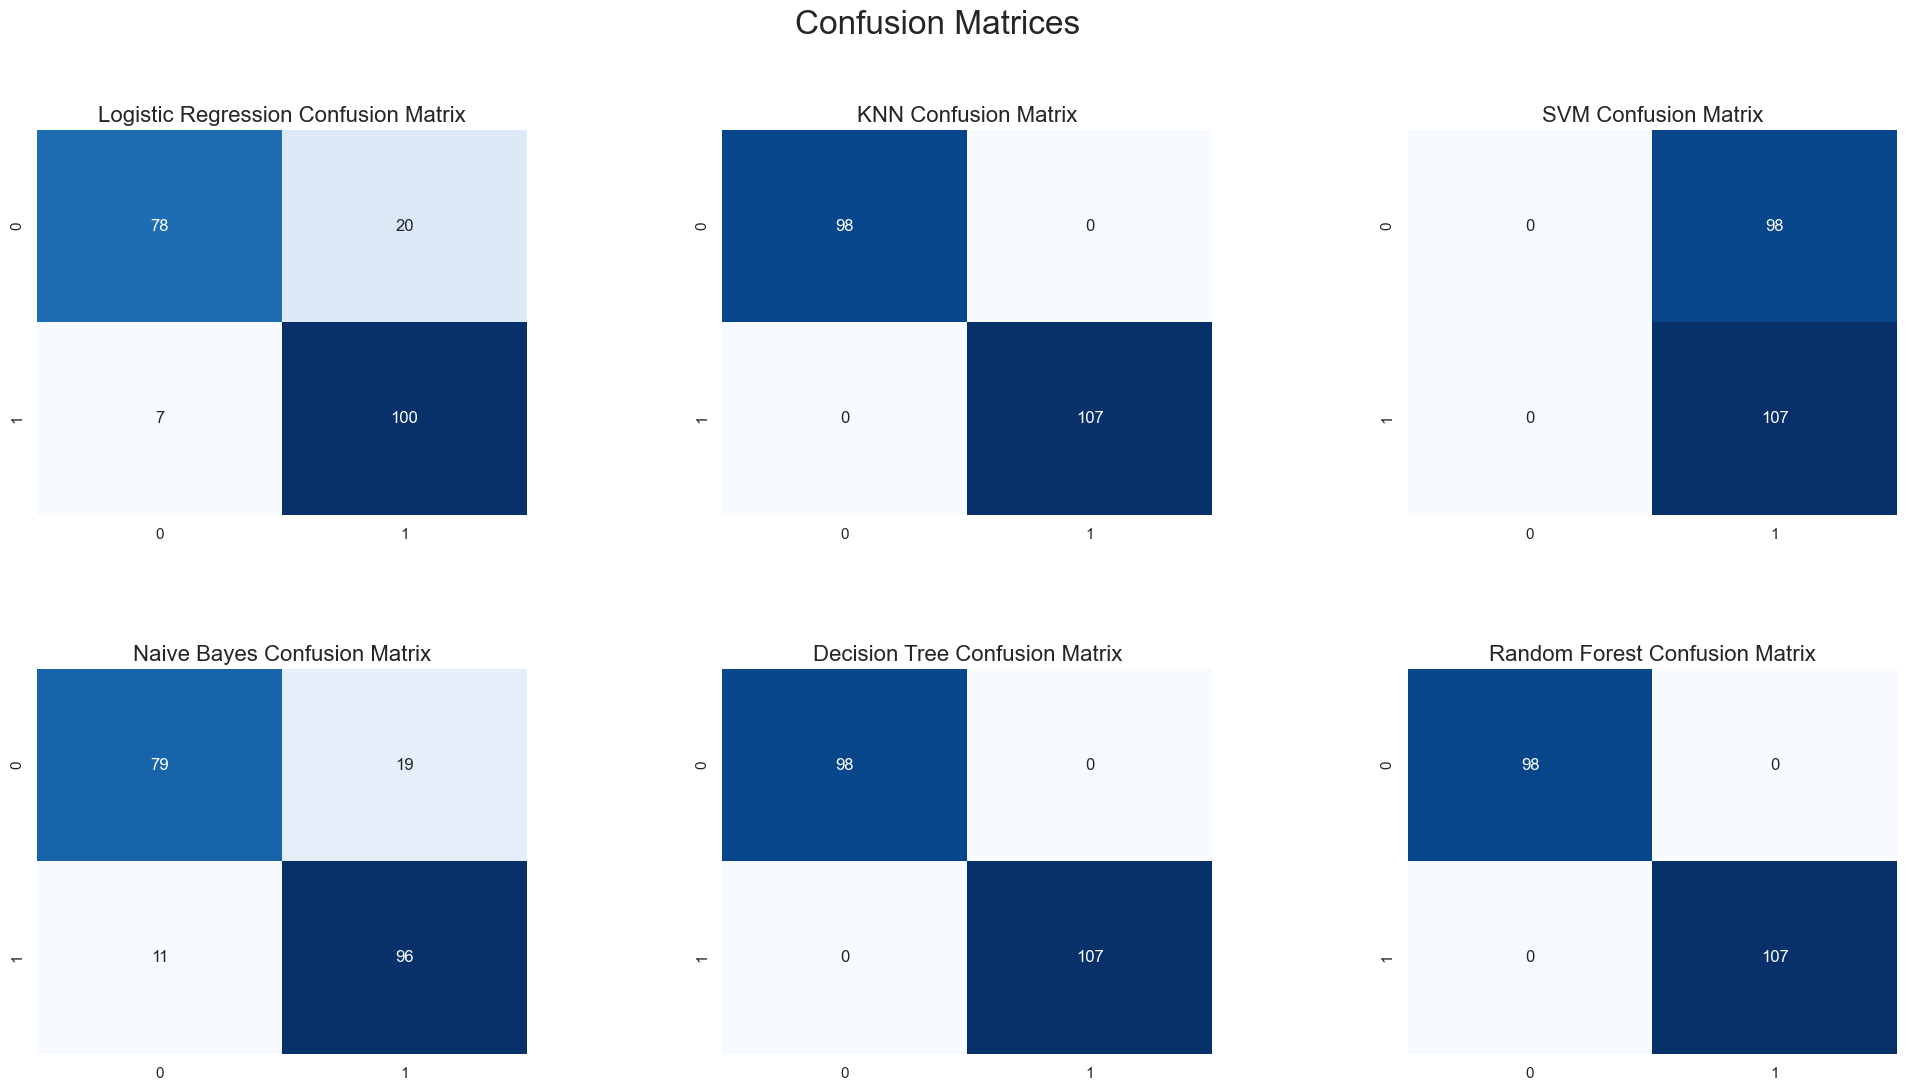

In [47]:
#plotting for heatmap using confusion matrices


plt.figure(figsize=(24, 12))
plt.suptitle('Confusion Matrices', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
sns.heatmap(cn_lr, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add other subplots for other models (if you have them)
plt.subplot(2, 3, 2)
plt.title('KNN Confusion Matrix', fontsize=16)
sns.heatmap(cn_knn, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(2, 3, 3)
plt.title('SVM Confusion Matrix', fontsize=16)
sns.heatmap(cn_svm, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(2, 3, 4)
plt.title('Naive Bayes Confusion Matrix', fontsize=16)
sns.heatmap(cn_nb, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(2, 3, 5)
plt.title('Decision Tree Confusion Matrix', fontsize=16)
sns.heatmap(cn_dtc, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(2, 3, 6)
plt.title('Random Forest Confusion Matrix', fontsize=16)
sns.heatmap(cn_rt, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.show()
